In [2]:
# Preamble

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from brokenaxes import brokenaxes
from pandas import ExcelWriter
from GIR.GIR import *

In [3]:
from math import *
from sympy.physics.vector import ReferenceFrame
from sympy.physics.vector import gradient
from mpl_toolkits.mplot3d import axes3d
import numpy as np
import mpmath as mp
mp.dps = 15; mp.pretty = True
import sympy as sp
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# Global Methane Emissions

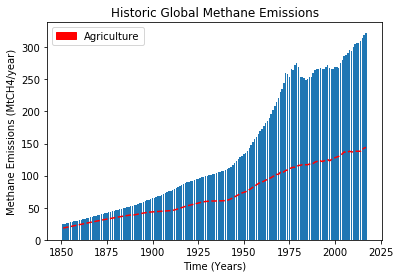

In [4]:
# Import data from Excel file

GlobalCH4Ems = pd.read_excel (
    r'Graphs/GraphData.xlsx', 
    sheet_name='Global Methane Emissions').drop([0]).rename(columns={"Unnamed: 0": "Year"})


# Rename years as "Year"
GlobalCH4Ems['Total'] = GlobalCH4Ems['Energy'] + GlobalCH4Ems['Industrial'] + GlobalCH4Ems['Waste'] + GlobalCH4Ems['Other'] + GlobalCH4Ems['Agriculture']

GlobalCH4Ems

#Plot of Global CH4 Emissions 1850 - 2017
t = GlobalCH4Ems['Year'][350:517]
s = GlobalCH4Ems['Total'][350:517]
rs = GlobalCH4Ems['Agriculture'][350:517]


fig, (ax) = plt.subplots()
ax.axhline(linewidth=1,color='black')


ax.set(xlabel='Time (Years)', ylabel='Methane Emissions (MtCH4/year)',
       title='Historic Global Methane Emissions')
# ax.grid()

# blue_patch = mpatches.Patch(color='blue', label='Total')
# plt.legend(handles=[blue_patch])
red_patch = mpatches.Patch(color='red', label='Agriculture')
plt.legend(handles=[red_patch])

plt.bar(t, s)
plt.plot(t, rs, 'r--')   #, 'b--', t, rs, 'r--')
# plt.show()
plt.savefig('Graphs/Methane Emissions Global.png', dpi=500)

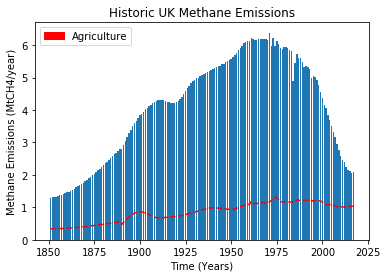

In [5]:
# Import data from Excel file

GlobalCH4Ems = pd.read_excel (
    r'Graphs/GraphData.xlsx', 
    sheet_name='UK Methane Emissions').drop([0]).rename(columns={"Unnamed: 0": "Year"})


# Make a total column
GlobalCH4Ems['Total'] = GlobalCH4Ems['Energy'] + GlobalCH4Ems['Industrial'] + GlobalCH4Ems['Waste'] + GlobalCH4Ems['Agriculture']

#Plot of Global CH4 Emissions 1850 - 2017
t = GlobalCH4Ems['Year'][350:517]
s = GlobalCH4Ems['Total'][350:517]
rs = GlobalCH4Ems['Agriculture'][350:517]


fig, (ax) = plt.subplots()
ax.axhline(linewidth=1,color='black')


ax.set(xlabel='Time (Years)', ylabel='Methane Emissions (MtCH4/year)',
       title='Historic UK Methane Emissions')
# ax.grid()

red_patch = mpatches.Patch(color='red', label='Agriculture')
plt.legend(handles=[red_patch])

plt.bar(t, s)
plt.plot(t, rs, 'r--')   #, 'b--', t, rs, 'r--')
# plt.show()
plt.savefig('Graphs/Methane Emissions UK.png', dpi=500)

# First Run to show CO2-fe emission for a CH4 pulse at year 0

In [15]:
# Test Emissions Timeseries
TimePeriod = 100 #Years
SLCPEmissions = np.zeros(TimePeriod).tolist()
SLCPEmissions[0] = 1
Years = np.arange(0,TimePeriod).tolist()

SLCPTimeSeries = pd.DataFrame(data = {'Year':Years,'SLCP':SLCPEmissions})

# CO2fe Calculator Constants

# CARBON
CarbonBoxes = np.array([0.2173,0.2240,0.2824,0.2763])
CarbonLifetimes = np.array([1000000,394.4,36.54,4.304])
Alpha = 1


# METHANE
MethaneBoxes = np.array([1,0,0,0])
MethaneLifetimes = np.array([9.15,1,1,1])
Beta = 1

StepDownPercentage = [0,0,0,0]

# CO2we Calculator Constants

dt = 20
H = 100
GWPH = 28
r = 0.75
s = 0.25

DecayConstants = pd.DataFrame(data = {'CarbonBoxes':CarbonBoxes,'CarbonLifetimes':CarbonLifetimes,'MethaneLifeBoxes':MethaneBoxes,'MethaneLifetimes':MethaneLifetimes})

Gamma = (1.65*0.351714258*0.000363)/(0.127867033*0.0000137)

PulseTestEmissionsOutput = CalculateCO2ForcingEquivalent(SLCPTimeSeries)




120.2545142635


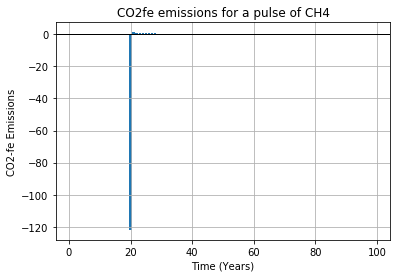

In [16]:
#Plot of the CO2-fe Emissions resulting from a 1Mt pulse emission of CH4 at the year 2000
t = PulseTestEmissionsOutput['Year'][1:100]
s = PulseTestEmissionsOutput['CO2fe'][1:100]


fig, (ax) = plt.subplots()
ax.bar(t, s)
ax.axhline(linewidth=1,color='black')



ax.set(xlabel='Time (Years)', ylabel='CO2-fe Emissions',
       title='CO2fe emissions for a pulse of CH4')
ax.grid()

plt.savefig('Graphs/CH4 Pulse CO2-fe Emissions.png', dpi=500)
print(PulseTestEmissionsOutput['CO2fe'][0])

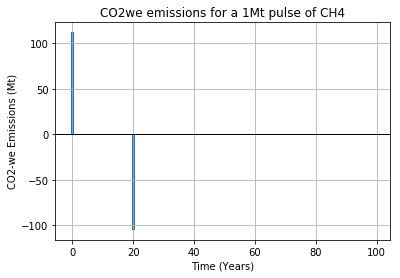

In [17]:
# Plot of the CO2-we Emissions resulting from a 1Mt pulse emission of CH4 at the year 2000
t = PulseTestEmissionsOutput['Year'][0:100]
s = PulseTestEmissionsOutput['CO2we'][0:100]


fig, (ax) = plt.subplots()
ax.bar(t, s, width=1)


ax.set(xlabel='Time (Years)', ylabel='CO2-we Emissions (Mt)',
       title='CO2we emissions for a 1Mt pulse of CH4')
ax.grid()
ax.axhline(linewidth=1,color='black')


plt.savefig('Graphs/CH4 Pulse CO2-we Emissions.png', dpi=500)

# Second Run to show that a Methane Lifetime defined by Updated GWP* (multi time const).
Methane lifetime defined by CO2-like decay for the first dt years followed by a step down reduction and subsequent CO2-like decay gives a CO2-we like equivalent emissions series. This is exact for times t>dt when the CO2 decay has only one time constant - proved in other notebook.

In [12]:
# Test Emissions Timeseries
SLCPEmissions = np.zeros(30).tolist()
SLCPEmissions[0] = 1
Years = np.arange(2000,2030).tolist()

SLCPTimeSeries = pd.DataFrame(data = {'Year':Years,'SLCP':SLCPEmissions})

# CO2we Calculator Constants

dt = 20
H = 100
GWPH = 28
r = 0.75
s = 0.25

# CO2fe Calculator Constants

# CARBON
CarbonBoxes = np.array([0.2173,0.2240,0.2824,0.2763])
CarbonLifetimes = np.array([1000000,394.4,36.54,4.304])
Alpha = 1


# METHANE
MethaneBoxes = CarbonBoxes
MethaneLifetimes = CarbonLifetimes
Beta = 1


DecayConstants = pd.DataFrame(data = {'CarbonBoxes':CarbonBoxes,'CarbonLifetimes':CarbonLifetimes,'MethaneLifeBoxes':MethaneBoxes,'MethaneLifetimes':MethaneLifetimes})

Gamma = (1.65*0.351714258*0.000363)/(0.127867033*0.0000137)

StepDownPercentage = np.array([exp(dt/CarbonLifetimes[0]),exp(dt/CarbonLifetimes[1]),exp(dt/CarbonLifetimes[2]),exp(dt/CarbonLifetimes[3])])*((r*H/dt)/(r*H/dt + s)) 
print(StepDownPercentage)
CalculateCO2ForcingEquivalent(SLCPTimeSeries)

[ 0.93751875  0.98626659  1.62061686 97.73909451]


,Year,SLCP,CO2fe,CO2we,CGWP,CGTP,Old-GWP*,GWP
0,2000,1.0,120.2545142635,112.0,3000.0,0.0,2800.0,28.0
1,2001,0.0,0.0,0.0,-3000.0,-3700.0,-2800.0,0.0
2,2002,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2003,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2005,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Plot of Methane Conc.:
    
n = 100
SLCPEmissions = np.zeros(n).tolist()
SLCPEmissions[0] = 1
Years = np.arange(0,100).tolist()

# CARBON
CarbonBoxes = np.array([0.2173,0.2240,0.2824,0.2763])
CarbonLifetimes = np.array([1000000,394.4,36.54,4.304])
Alpha = 1
# StepDownPercentage = 1.57236981574765
dt = 20
H = 100
GWPH = 28
r = 0.75
s = 0.25
# StepDownPercentage = np.array([exp(dt/CarbonLifetimes[0]),exp(dt/CarbonLifetimes[1]),exp(dt/CarbonLifetimes[2]),exp(dt/CarbonLifetimes[3])])*0.5#((r*H/dt)/(r*H/dt + s))


CH4GWPStarLifeTime = pd.DataFrame(data = {'Year':Years,'[CH4]':SLCPEmissions, 'Real[CH4]':SLCPEmissions})

def Dch4(k,t):
    Dch4 = CarbonBoxes[k]*exp(-t/(Alpha*CarbonLifetimes[k]))
    if t < 20:
        return CarbonBoxes[k]*exp(-t/(Alpha*CarbonLifetimes[k]))
    else:
        return CarbonBoxes[k]*(exp(-t/(Alpha*CarbonLifetimes[k])) - ((r*H/dt)/(r*H/dt + s))*(exp(dt/CarbonLifetimes[k])*exp(-(t-1)/(CarbonLifetimes[k]))))
    
def DRch4(t):
    DRch4 = exp(-t/9.15)
    return DRch4

for i in CH4GWPStarLifeTime.index:
    
    CH4GWPStarLifeTime.loc[i,'[CH4]'] = Dch4(0,i) + Dch4(1,i) + Dch4(2,i) + Dch4(3,i)  #mp.nsum(lambda k: Dch4(int(k),int(i)), [0,3])
    CH4GWPStarLifeTime.loc[i,'Real[CH4]'] = DRch4(i) # + Dch4(1,i) + Dch4(2,i) + Dch4(3,i)  #mp.nsum(lambda k: Dch4(int(k),int(i)), [0,3])
    

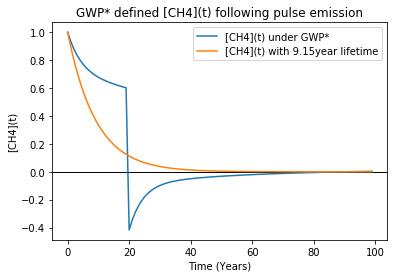

In [14]:
#Plot of the CO2-fe Emissions resulting from a 1Mt pulse emission of CH4 at the year 2000
t = CH4GWPStarLifeTime['Year']
s = CH4GWPStarLifeTime['[CH4]']
rs = CH4GWPStarLifeTime['Real[CH4]']

t1=t
s0=rs
s1=s


fig, (ax) = plt.subplots()
ax.axhline(linewidth=1,color='black')


ax.set(xlabel='Time (Years)', ylabel='[CH4](t)',
       title='GWP* defined [CH4](t) following pulse emission')
# ax.grid()



plt.plot(t, s, label='[CH4](t) under GWP*')
plt.plot(t, rs, label='[CH4](t) with 9.15year lifetime')#, 'b--', t, rs, 'r--')
ax.legend()
plt.savefig('Graphs/GWP* Metric.png', dpi=500)

# Testing with alternate GWP* constants

In [18]:
# Plot of Methane Conc.:
    
n = 100
TestSLCPEmissions = np.zeros(n).tolist()
TestSLCPEmissions[0] = 1
Years = np.arange(0,100).tolist()

# CARBON
CarbonBoxes = np.array([0.2173,0.2240,0.2824,0.2763])
CarbonLifetimes = np.array([1000000,394.4,36.54,4.304])
Alpha = 1
TestDt = 10
TestStepDownPercentage = np.array([exp(TestDt/CarbonLifetimes[0]),exp(TestDt/CarbonLifetimes[1]),exp(TestDt/CarbonLifetimes[2]),exp(TestDt/CarbonLifetimes[3])])


TestCH4GWPStarLifeTime = pd.DataFrame(data = {'Year':Years,'[CH4]':TestSLCPEmissions, 'Real[CH4]':TestSLCPEmissions})

def Dch4(k,t):
    Dch4 = CarbonBoxes[k]*exp(-t/(Alpha*CarbonLifetimes[k]))
    if t < TestDt:
        return Dch4
    else:
        return (1 - TestStepDownPercentage[k])*Dch4
    
def DRch4(t):
    DRch4 = exp(-t/9.15)
    return DRch4

for i in TestCH4GWPStarLifeTime.index:
    
    TestCH4GWPStarLifeTime.loc[i,'[CH4]'] = Dch4(0,i) + Dch4(1,i) + Dch4(2,i) + Dch4(3,i)  #mp.nsum(lambda k: Dch4(int(k),int(i)), [0,3])
    TestCH4GWPStarLifeTime.loc[i,'Real[CH4]'] = DRch4(i)# + Dch4(1,i) + Dch4(2,i) + Dch4(3,i)  #mp.nsum(lambda k: Dch4(int(k),int(i)), [0,3])
    

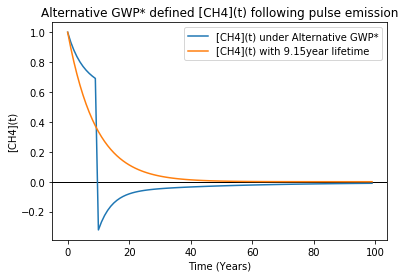

In [19]:
#Plot of the CO2-fe Emissions resulting from a 1Mt pulse emission of CH4 at the year 2000
t = TestCH4GWPStarLifeTime['Year']
s = TestCH4GWPStarLifeTime['[CH4]']
rs = TestCH4GWPStarLifeTime['Real[CH4]']


fig, (ax) = plt.subplots()
ax.axhline(linewidth=1,color='black')


ax.set(xlabel='Time (Years)', ylabel='[CH4](t)',
       title='Alternative GWP* defined [CH4](t) following pulse emission')
# ax.grid()

plt.plot(t, s, label='[CH4](t) under Alternative GWP*')
plt.plot(t, rs, label='[CH4](t) with 9.15year lifetime')
ax.legend()
plt.savefig('Graphs/GWP* Metric Alternative (reduced dt).png', dpi=500)

# Methane Lifetime defined by CGWP and Old-GWP*

[1.000001   1.00253871 1.02774519 1.26155111]


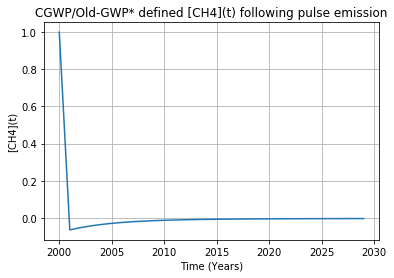

In [20]:
# Plot of Methane Conc.:
    
n = 30
SLCPEmissions = np.zeros(n).tolist()
SLCPEmissions[0] = 1
Years = np.arange(2000,2030).tolist()

# CARBON
CarbonBoxes = np.array([0.2173,0.2240,0.2824,0.2763])
CarbonLifetimes = np.array([1000000,394.4,36.54,4.304])
Alpha = 1
dt = 1
StepDownPercentage = np.array([exp(dt/CarbonLifetimes[0]),exp(dt/CarbonLifetimes[1]),exp(dt/CarbonLifetimes[2]),exp(dt/CarbonLifetimes[3])])


CH4GWPStarLifeTime = pd.DataFrame(data = {'Year':Years,'[CH4]':SLCPEmissions})

def Dch4(k,t):
    Dch4 = CarbonBoxes[k]*exp(-t/(Alpha*CarbonLifetimes[k]))
    if t < 1:
        return Dch4
    else:
        return (1-StepDownPercentage[k])*Dch4

for i in CH4GWPStarLifeTime.index:
    
    CH4GWPStarLifeTime.loc[i,'[CH4]'] = Dch4(0,i) + Dch4(1,i) + Dch4(2,i) + Dch4(3,i)  #mp.nsum(lambda k: Dch4(int(k),int(i)), [0,3])
    
    

#Plot of the CO2-fe Emissions resulting from a 1Mt pulse emission of CH4 at the year 2000
t = CH4GWPStarLifeTime['Year']
s = CH4GWPStarLifeTime['[CH4]']

s2=s

fig, (ax) = plt.subplots()
ax.plot(t, s)


ax.set(xlabel='Time (Years)', ylabel='[CH4](t)',
       title='CGWP/Old-GWP* defined [CH4](t) following pulse emission')
ax.grid()

print(StepDownPercentage)
plt.savefig('Graphs/CH4 Equivalent Decay CGWP Old-GWP*', dpi=500)

# Methane Lifetime defined by GWP

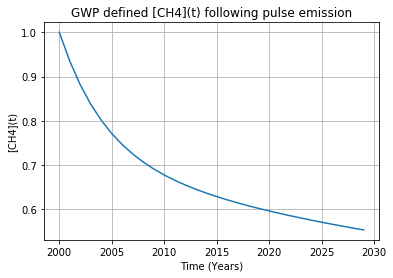

In [21]:
# Plot of Methane Conc.:
    
n = 30
SLCPEmissions = np.zeros(n).tolist()
SLCPEmissions[0] = 1
Years = np.arange(2000,2030).tolist()

# CARBON
CarbonBoxes = np.array([0.2173,0.2240,0.2824,0.2763])
CarbonLifetimes = np.array([1000000,394.4,36.54,4.304])
Alpha = 1
StepDownPercentage = 0


CH4GWPStarLifeTime = pd.DataFrame(data = {'Year':Years,'[CH4]':SLCPEmissions})

def Dch4(k,t):
    Dch4 = CarbonBoxes[k]*exp(-t/(Alpha*CarbonLifetimes[k]))
    if t < 1:
        return Dch4
    else:
        return (1-StepDownPercentage)*Dch4

for i in CH4GWPStarLifeTime.index:
    
    CH4GWPStarLifeTime.loc[i,'[CH4]'] = Dch4(0,i) + Dch4(1,i) + Dch4(2,i) + Dch4(3,i)  #mp.nsum(lambda k: Dch4(int(k),int(i)), [0,3])
    
    

#Plot of the CO2-fe Emissions resulting from a 1Mt pulse emission of CH4 at the year 2000
t = CH4GWPStarLifeTime['Year']
s = CH4GWPStarLifeTime['[CH4]']

s3=s

fig, (ax) = plt.subplots()
ax.plot(t, s)


ax.set(xlabel='Time (Years)', ylabel='[CH4](t)',
       title='GWP defined [CH4](t) following pulse emission')
ax.grid()

plt.savefig('Graphs/CH4 Equivalent Decay GWP', dpi=500)


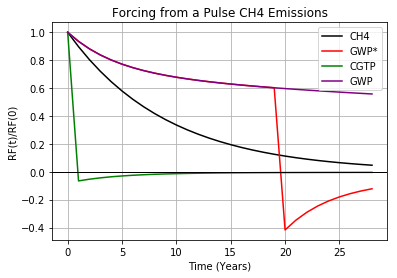

In [23]:
fig, (ax) = plt.subplots()
ax.plot(t1[0:29], s0[0:29], color = "black",  label = 'CH4')
ax.plot(t1[0:29], s1[0:29], color = "red",  label = 'GWP*')
ax.plot(t1[0:29], s2[0:29], color = "green",  label = 'CGTP')
ax.plot(t1[0:29], s3[0:29], color = "purple", label = 'GWP')

ax.legend()
ax.axhline(linewidth=1,color='black')

ax.set(xlabel='Time (Years)', ylabel='RF(t)/RF(0)',
       title='Forcing from a Pulse CH4 Emissions')
ax.grid()
plt.savefig('Graphs/CH4 Equivalent Decay Overlayed', dpi=500)

# CO2_fe Calculator

### Description
Calculate CO2 forcing equivalent emissions for a time series of SLCP emissions. The CO2_fe series will, in yearly steps, give rise to a virtual CO2 concentration that decays according to the AR5 CO2 linear decay model. Considering the radiative efficiency of CO2 and the SLCP and their concentrations, radiative forcings will be calculated and matched to specify the virtual CO2_fe emission.

### Inputs
1. SLCP emission time series - what form should this take???
2. SLCP decay model constants (resevoir constants and atmospheric lifetimes)

### Outputs
1. Dataframe of the CO2_fe timeseries

### References
...



In [7]:
# CO2fe and CO2we Emissions Calculator

def Dco2(k,t):
    Dco2 = CarbonBoxes[k]*exp(-t/(CarbonLifetimes[k]))
    return Dco2
    
def Dch4(k,t):
    Dch4 = MethaneBoxes[k]*exp(-t/(MethaneLifetimes[k]))
    if t < 20:
        return Dch4
    else:
        return (1-StepDownPercentage[k])*Dch4
    
CGWP100Value = 3000
GWP100Value = 28
CGTP75Value = 3700

def CalculateCO2ForcingEquivalent(SLCPTimeSeries):
    
    CO2eTimeSeries = SLCPTimeSeries
    
#   Create the output DataFrame and add Columns for CO2fe(t) and CO2we(t) emissions and R(t) and S(t) intermediaries.
    CO2eTimeSeries = SLCPTimeSeries
    BlankEmissions = np.zeros(len(SLCPTimeSeries))
    FourColumnBlankEmissions = pd.DataFrame(np.array([BlankEmissions,BlankEmissions,BlankEmissions,BlankEmissions]).transpose())
    CO2eTimeSeries['CO2fe'] = BlankEmissions
    CO2eTimeSeries['CO2we'] = BlankEmissions
    CO2eTimeSeries['CGWP'] = BlankEmissions
    CO2eTimeSeries['CGTP'] = BlankEmissions
    CO2eTimeSeries['Old-GWP*'] = BlankEmissions
    CO2eTimeSeries['GWP'] = BlankEmissions
    
#   Make R and S dataframes
    R = pd.concat([SLCPTimeSeries[{'Year','SLCP'}],pd.DataFrame(FourColumnBlankEmissions)], axis=1)
    R['Total'] = BlankEmissions
    S = pd.concat([SLCPTimeSeries[{'Year','SLCP'}],pd.DataFrame(FourColumnBlankEmissions)], axis=1)
    S['Total'] = BlankEmissions

#   Compute the CO2fe values for each year
    for i in CO2eTimeSeries.index:
        
        for k in DecayConstants.index:
#           Compute S(i) and enter that value for the current i (Year)
            S.loc[i,k] = mp.nsum(lambda j: CO2eTimeSeries.loc[int(j),'SLCP']*Dch4(k,i-j), [0,i])

#           Compute R(i) given S(i) and existing values of R(i)
            R.loc[i,k] = mp.nsum(lambda j: (S.loc[int(j),'Total']-R.loc[int(j),'Total'])*Dco2(k,i-j), [0,i-1])
    
        S.loc[i,'Total'] = mp.nsum(lambda k: S.loc[i,k], [0,len(DecayConstants.index)-1])
        R.loc[i,'Total'] = mp.nsum(lambda k: R.loc[i,k], [0,len(DecayConstants.index)-1])

#       Compute CO2fe(i) from these values of S(i) and R(i)
        CO2eTimeSeries.loc[i,'CO2fe'] = Gamma*(S.loc[i,'Total'] - R.loc[i,'Total'])
        
#       Compute CO2we
        Et = CO2eTimeSeries.loc[i,'SLCP']
        EtMinusdt = 0
        if i > 19:
            EtMinusdt = CO2eTimeSeries.loc[int(i-20),'SLCP']
        CO2eTimeSeries.loc[i,'CO2we'] = GWPH*((r*H)/dt*(Et - EtMinusdt) + s*Et)
        
#       Compute CGWP and Old-GWP* Equivalent Emissions
        if i > 0:
            CO2eTimeSeries.loc[i,'CGWP'] = CGWP100Value*(CO2eTimeSeries.loc[i,'SLCP'] - CO2eTimeSeries.loc[i-1,'SLCP'])
            CO2eTimeSeries.loc[i,'CGTP'] = CGTP75Value*(CO2eTimeSeries.loc[i,'SLCP'] - CO2eTimeSeries.loc[i-1,'SLCP'])            
            CO2eTimeSeries.loc[i,'Old-GWP*'] = GWPH*H*(CO2eTimeSeries.loc[i,'SLCP'] - CO2eTimeSeries.loc[i-1,'SLCP'])
        else:
            CO2eTimeSeries.loc[i,'CGWP'] = CGWP100Value*CO2eTimeSeries.loc[i,'SLCP']
            CO2eTimeSeries.loc[i,'Old-GWP*'] = GWPH*H*CO2eTimeSeries.loc[i,'SLCP']
            
#       Compute GWP equivalent emissions
        CO2eTimeSeries.loc[i,'GWP'] = GWP100Value*CO2eTimeSeries.loc[i,'SLCP']
    return CO2eTimeSeries

# CH4fe Emissions

## CO2 Pulse

In [8]:
# Test Emissions Timeseries
TimePeriod = 100 #Years
SLCPEmissions = np.zeros(TimePeriod).tolist()
SLCPEmissions[0] = 1
Years = np.arange(0,TimePeriod).tolist()

SLCPTimeSeries = pd.DataFrame(data = {'Year':Years,'SLCP':SLCPEmissions})

# CO2fe Calculator Constants

# CARBON
CarbonBoxes = np.array([1,0,0,0])
CarbonLifetimes = np.array([9.15,1,1,1])

# METHANE
MethaneBoxes = np.array([0.2173,0.2240,0.2824,0.2763])
MethaneLifetimes = np.array([1000000,394.4,36.54,4.304])



StepDownPercentage = [0,0,0,0]

# CO2we Calculator Constants

dt = 20
H = 100
GWPH = 28
r = 0.75
s = 0.25

DecayConstants = pd.DataFrame(data = {'CarbonBoxes':CarbonBoxes,'CarbonLifetimes':CarbonLifetimes,'MethaneLifeBoxes':MethaneBoxes,'MethaneLifetimes':MethaneLifetimes})

Gamma = 1/((1.65*0.351714258*0.000363)/(0.127867033*0.0000137))

InvertedPulseTestEmissionsOutput = CalculateCO2ForcingEquivalent(SLCPTimeSeries)


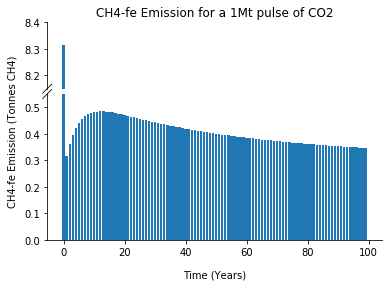

In [9]:
#Plot of the CO2-fe Emissions resulting from a 1Mt pulse emission of CH4 at the year 2000
t = InvertedPulseTestEmissionsOutput['Year'][0:100]
s = InvertedPulseTestEmissionsOutput['CO2fe'][0:100]*1000
u = InvertedPulseTestEmissionsOutput['CO2we'][0:100]*1000

fig = plt.figure()
bax = brokenaxes(ylims=((0, .55), (8.15, 8.4)), hspace=.05)
bax.bar(t, s, label='CH4fe')
bax.set_xlabel('Time (Years)')
bax.set_ylabel('CH4-fe Emission (Tonnes CH4)')
bax.set_title('CH4-fe Emission for a 1Mt pulse of CO2')

plt.savefig('Graphs/CH4fe Emission for CO2 pulse', dpi=500)

## CO2 Step

In [10]:
# Test Emissions Timeseries
TimePeriod = 100 #Years
SLCPEmissions = np.ones(TimePeriod).tolist()
Years = np.arange(0,TimePeriod).tolist()

SLCPTimeSeries = pd.DataFrame(data = {'Year':Years,'SLCP':SLCPEmissions})

# CO2fe Calculator Constants

# CARBON
CarbonBoxes = np.array([1,0,0,0])
CarbonLifetimes = np.array([9.15,1,1,1])

# METHANE
MethaneBoxes = np.array([0.2173,0.2240,0.2824,0.2763])
MethaneLifetimes = np.array([1000000,394.4,36.54,4.304])

StepDownPercentage = [0,0,0,0]

# CO2we Calculator Constants

dt = 20
H = 100
GWPH = 28
r = 0.75
s = 0.25

DecayConstants = pd.DataFrame(data = {'CarbonBoxes':CarbonBoxes,'CarbonLifetimes':CarbonLifetimes,'MethaneLifeBoxes':MethaneBoxes,'MethaneLifetimes':MethaneLifetimes})

Gamma = 1/((1.65*0.351714258*0.000363)/(0.127867033*0.0000137))

InvertedStepTestEmissionsOutput = CalculateCO2ForcingEquivalent(SLCPTimeSeries)


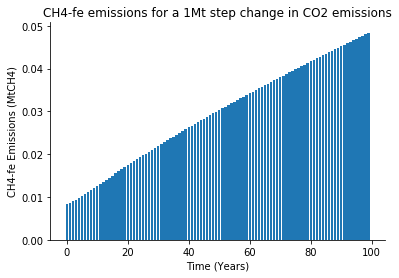

In [11]:
#Plot of the CO2-fe Emissions resulting from a 1Mt pulse emission of CH4 at the year 2000
t = InvertedStepTestEmissionsOutput['Year'][0:100]
s = InvertedStepTestEmissionsOutput['CO2fe'][0:100]


fig, (ax) = plt.subplots()
ax.bar(t, s)
ax.set(ylabel='CH4-fe Emissions (MtCH4)',
       title='CH4-fe emissions for a 1Mt step change in CO2 emissions',
       xlabel='Time (Years)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('Graphs/CH4fe Emission for CO2 step', dpi=500)

# CO2fe Emissions

## CH4 Pulse

In [ ]:
# Test Emissions Timeseries
TimePeriod = 100 #Years
SLCPEmissions = np.zeros(TimePeriod).tolist()
SLCPEmissions[0] = 1
Years = np.arange(0,TimePeriod).tolist()

SLCPTimeSeries = pd.DataFrame(data = {'Year':Years,'SLCP':SLCPEmissions})

# CO2fe Calculator Constants

# CARBON
CarbonBoxes = np.array([0.2173,0.2240,0.2824,0.2763])
CarbonLifetimes = np.array([1000000,394.4,36.54,4.304])

# METHANE
MethaneBoxes = np.array([1,0,0,0])
MethaneLifetimes = np.array([9.15,1,1,1])



StepDownPercentage = [0,0,0,0]

# CO2we Calculator Constants

dt = 20
H = 100
GWPH = 28
r = 0.75
s = 0.25

DecayConstants = pd.DataFrame(data = {'CarbonBoxes':CarbonBoxes,'CarbonLifetimes':CarbonLifetimes,'MethaneLifeBoxes':MethaneBoxes,'MethaneLifetimes':MethaneLifetimes})

Gamma = (1.65*0.351714258*0.000363)/(0.127867033*0.0000137)

PulseTestEmissionsOutput = CalculateCO2ForcingEquivalent(SLCPTimeSeries)


In [ ]:
#Plot of the CO2-fe Emissions resulting from a 1Mt pulse emission of CH4 at the year 2000
t = PulseTestEmissionsOutput['Year'][0:100]
PulseTestEmissionsOutput['CO2fe'][0]=0
InitialEmission = SLCPEmissions = np.zeros(TimePeriod).tolist()
InitialEmission[0] = 120.3
s = PulseTestEmissionsOutput['CO2fe'][0:100]
u = PulseTestEmissionsOutput['CO2we'][0:100]
v = InitialEmission
x = PulseTestEmissionsOutput['GWP']

fig = plt.figure()
bax = brokenaxes(ylims=((-106, -103.5), (-6.5, 1.5), (24,31), (109, 121)), hspace=.05)
bax.plot(t, s, color = (0.1, 0.2, 0.9, 0.6), linewidth = 2.5)
bax.bar(t, v, color = (0.1, 0.2, 0.9, 0.6))
bax.bar(t, u, color = "red", label='CO2we')
bax.bar(t, x, color = "purple", label='CO2e')


bax.set_xlabel('Time (Years)')
bax.set_ylabel('CO2-fe Emission (MtCO2e)')
bax.set_title('CO2-fe Emission for a 1Mt pulse of CH4')
bax.axhline(linewidth=1,color='black')

bax.grid(color=(0, 0, 0, 0.3), linestyle='-', linewidth=0.05)
bax.legend()

plt.savefig('Graphs/CO2 Equivalent Emissions for CH4 Pulse', dpi=1000)

## CH4 Step

In [ ]:
# Test Emissions Timeseries
TimePeriod = 200 #Years
SLCPEmissions = np.ones(TimePeriod).tolist()
Years = np.arange(-50,TimePeriod-50).tolist()
SLCPEmissions[0:49]=np.zeros(50).tolist()

SLCPTimeSeries = pd.DataFrame(data = {'Year':Years,'SLCP':SLCPEmissions})

# CO2fe Calculator Constants

# CARBON
CarbonBoxes = np.array([0.2173,0.2240,0.2824,0.2763])
CarbonLifetimes = np.array([1000000,394.4,36.54,4.304])

# METHANE
MethaneBoxes = np.array([1,0,0,0])
MethaneLifetimes = np.array([9.15,1,1,1])

StepDownPercentage = [0,0,0,0]

# CO2we Calculator Constants

dt = 20
H = 100
GWPH = 28
r = 0.75
s = 0.25

DecayConstants = pd.DataFrame(data = {'CarbonBoxes':CarbonBoxes,'CarbonLifetimes':CarbonLifetimes,'MethaneLifeBoxes':MethaneBoxes,'MethaneLifetimes':MethaneLifetimes})

Gamma = (1.65*0.351714258*0.000363)/(0.127867033*0.0000137)

StepTestEmissionsOutput = CalculateCO2ForcingEquivalent(SLCPTimeSeries)


In [ ]:
#Plot of the CO2-fe Emissions resulting from a 1Mt pulse emission of CH4 at the year 2000
t = StepTestEmissionsOutput['Year']
s = StepTestEmissionsOutput['CO2fe']


fig, (ax) = plt.subplots()
ax.bar(t, s)
ax.set(ylabel='CO2-fe Emissions (MtCO2e)',
       title='CO2-fe emissions for a 1Mt step change in CH4 emissions',
       xlabel='Time (Years)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('Graphs/CO2fe Emission for CH4 step', dpi=500)

In [ ]:
t = StepTestEmissionsOutput['Year'][0:200]
s = StepTestEmissionsOutput['CO2fe'][0:200]
u = StepTestEmissionsOutput['CO2we'][0:200]
x = StepTestEmissionsOutput['GWP']

fig, (bax) = plt.subplots()
bax.plot(t, s, color = (0.1, 0.2, 0.9, 0.6), linewidth = 2.5)
bax.plot(t, u, color = "red", label='CO2we')
bax.plot(t, x, color = "purple", label='CO2e')


bax.set_xlabel('Time (Years)')
bax.set_ylabel('CO2-fe Emission (MtCO2e)')
bax.set_title('CO2-fe Emission for a 1Mt Step of CH4')
bax.axhline(linewidth=1,color='black')
bax.axvline(linewidth=1,color='black')

bax.grid(color=(0, 0, 0, 0.3), linestyle='-', linewidth=0.05)
bax.legend()

plt.savefig('Graphs/CO2 Equivalent Emissions for CH4 Step', dpi=1000)

# 3 Part killer figure combo!

### Emission using AR5 values 

In [ ]:
TimePeriod = 200 #Years
SLCPEmissions = np.ones(TimePeriod).tolist()
SLCPEmissions[0:49]=np.zeros(50).tolist()
Years = np.arange(-50,TimePeriod-49).tolist()

SLCPTimeSeries = pd.DataFrame(data = {'Year':Years,'SLCP':SLCPEmissions})

# CO2fe Calculator Constants

# CARBON
CarbonBoxes = np.array([0.2173,0.2240,0.2824,0.2763])
CarbonLifetimes = np.array([1000000,394.4,36.54,4.304])

# METHANE
MethaneBoxes = np.array([1,0,0,0])
MethaneLifetimes = np.array([9.15,1,1,1])

StepDownPercentage = [0,0,0,0]

# CO2we Calculator Constants

dt = 20
H = 100
GWPH = 28
r = 0.75
s = 0.25

DecayConstants = pd.DataFrame(data = {'CarbonBoxes':CarbonBoxes,'CarbonLifetimes':CarbonLifetimes,'MethaneLifeBoxes':MethaneBoxes,'MethaneLifetimes':MethaneLifetimes})

Gamma = (1.65*0.351714258*0.000363)/(0.127867033*0.0000137)

StepTestEmissionsOutput = CalculateCO2ForcingEquivalent(SLCPTimeSeries)


### Concentration/Forcing: Using AR5 values for decay

In [ ]:
# Let's carry out a few basic runs now, starting with pulse emissions for each gas.

# First generate an empty emissions dataframe with four different scenarios

pulse_emissions = return_empty_emissions(df_to_copy=False, start_year=0, end_year=100, timestep=1, scen_names=['None']+[x+'pulse' for x in ['CO2','CH4','N2O']], gases_in = ['CO2','CH4','N2O'])

# add pulses in year 10 (the units are GtC, MtCH4 and MtN2O-N2):

# for gas in ['CO2','CH4','N2O']:
    
pulse_emissions.loc[10,('CO2'+'pulse','CO2')] += 10
    
# Now generate a compatible forcing dataframe:

pulse_forcing = return_empty_forcing(pulse_emissions)

# And run the model!

pulse_run = run_GIR(emissions_in=pulse_emissions,forcing_in=pulse_forcing)
pulse_run['T']

In [ ]:
# Generate a default parameter dataframe:

test_gas_parameters = get_gas_parameter_defaults()

test_thermal_parameters = get_thermal_parameter_defaults()

# This is what the parameter dataframes look like:
test_gas_parameters['default','CO2']['rT']